In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Brief Description of the data set and a summary of the attributes

The dataset includes facebook data and has several features, e.g. gender, age, tensure, likes. This dataset can be used for a bit more advanced analytics. I'll try to predict the feature "gender".

The link to the Kaggle Dataset: https://www.kaggle.com/datasets/sheenabatra/facebook-data

In [3]:
df = pd.read_csv("facebook.csv")

NameError: name 'pd' is not defined

In [9]:
df

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98998,1268299,68,4,1945,4,female,541.0,2118,341,3996,18089,3505,11887,491,6202
98999,1256153,18,12,1995,3,female,21.0,1968,1720,4401,13412,4399,10592,2,2820
99000,1195943,15,10,1998,5,female,111.0,2002,1524,11959,12554,11959,11462,0,1092
99001,1468023,23,11,1990,4,female,416.0,2560,185,4506,6516,4506,5760,0,756


In [11]:
df.describe()

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,9.900300e+04,99003.000000,99003.000000,99003.000000,99003.000000,99001.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000
mean,1.597045e+06,37.280224,14.530408,1975.719776,6.283365,537.887375,196.350787,107.452471,156.078785,142.689363,106.116300,84.120491,49.962425,58.568831
std,3.440592e+05,22.589748,9.015606,22.589748,3.529672,457.649874,387.304229,188.786951,572.280681,1387.919613,445.252985,839.889444,285.560152,601.416348
min,1.000008e+06,13.000000,1.000000,1900.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.298806e+06,20.000000,7.000000,1963.000000,3.000000,226.000000,31.000000,17.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.596148e+06,28.000000,14.000000,1985.000000,6.000000,412.000000,82.000000,46.000000,11.000000,8.000000,4.000000,4.000000,0.000000,2.000000
75%,1.895744e+06,50.000000,22.000000,1993.000000,9.000000,675.000000,206.000000,117.000000,81.000000,59.000000,46.000000,33.000000,7.000000,20.000000
max,2.193542e+06,113.000000,31.000000,2000.000000,12.000000,3139.000000,4923.000000,4144.000000,25111.000000,261197.000000,25111.000000,138561.000000,14865.000000,129953.000000


In [13]:
features = df.columns
features

Index(['userid', 'age', 'dob_day', 'dob_year', 'dob_month', 'gender', 'tenure',
       'friend_count', 'friendships_initiated', 'likes', 'likes_received',
       'mobile_likes', 'mobile_likes_received', 'www_likes',
       'www_likes_received'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   userid                 99003 non-null  int64  
 1   age                    99003 non-null  int64  
 2   dob_day                99003 non-null  int64  
 3   dob_year               99003 non-null  int64  
 4   dob_month              99003 non-null  int64  
 5   gender                 98828 non-null  object 
 6   tenure                 99001 non-null  float64
 7   friend_count           99003 non-null  int64  
 8   friendships_initiated  99003 non-null  int64  
 9   likes                  99003 non-null  int64  
 10  likes_received         99003 non-null  int64  
 11  mobile_likes           99003 non-null  int64  
 12  mobile_likes_received  99003 non-null  int64  
 13  www_likes              99003 non-null  int64  
 14  www_likes_received     99003 non-null  int64  
dtypes:

array([[<Axes: title={'center': 'userid'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'dob_day'}>,
        <Axes: title={'center': 'dob_year'}>],
       [<Axes: title={'center': 'dob_month'}>,
        <Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'friend_count'}>,
        <Axes: title={'center': 'friendships_initiated'}>],
       [<Axes: title={'center': 'likes'}>,
        <Axes: title={'center': 'likes_received'}>,
        <Axes: title={'center': 'mobile_likes'}>,
        <Axes: title={'center': 'mobile_likes_received'}>],
       [<Axes: title={'center': 'www_likes'}>,
        <Axes: title={'center': 'www_likes_received'}>, <Axes: >,
        <Axes: >]], dtype=object)

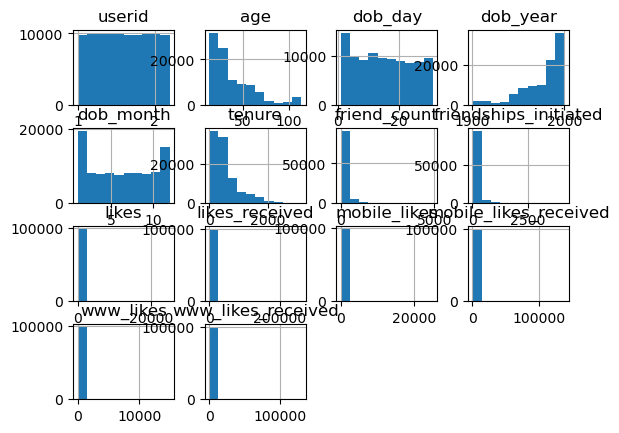

In [17]:
df.hist()

In [21]:
num_features = [feature for feature in features if df[feature].dtype != object]
cat_features = [feature for feature in features if df[feature].dtype == object]
num_features

['userid',
 'age',
 'dob_day',
 'dob_year',
 'dob_month',
 'tenure',
 'friend_count',
 'friendships_initiated',
 'likes',
 'likes_received',
 'mobile_likes',
 'mobile_likes_received',
 'www_likes',
 'www_likes_received']

In [23]:
cat_features

['gender']

In [25]:
df = df.fillna(method="bfill")

C:\Users\Tim\AppData\Local\Temp\ipykernel_14960\2154904616.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method="bfill")


## Initial plan for data exploration

In data exploration we will plot histograms, boxplots, correlation matrix.subplot of all numerical features and see a countplot of categorical variables.

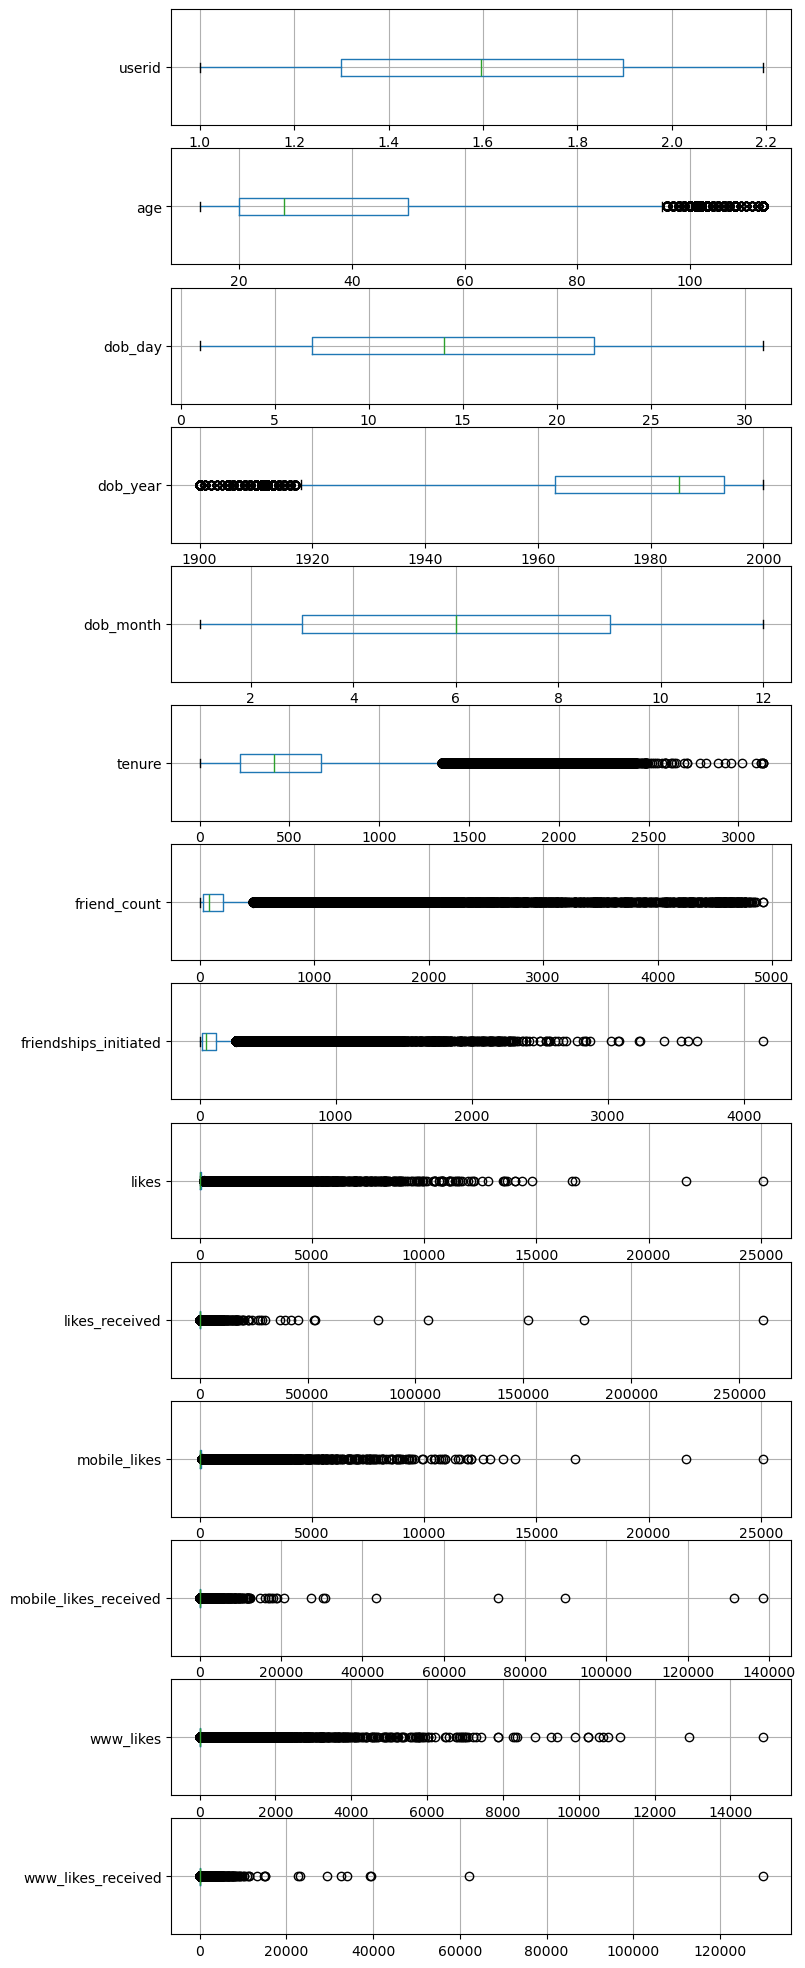

In [31]:
fig, axes = plt.subplots(14,1 ,figsize=(8,25))

for i,c in enumerate(num_features):
    f = df[[c]].boxplot(ax=axes[i], vert=False)

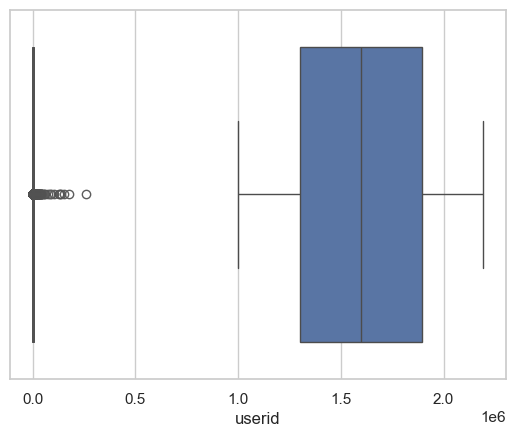

In [35]:
sns.set_theme(style="whitegrid")
for i, c in enumerate(num_features):
    ax = sns.boxplot(x = df[c])

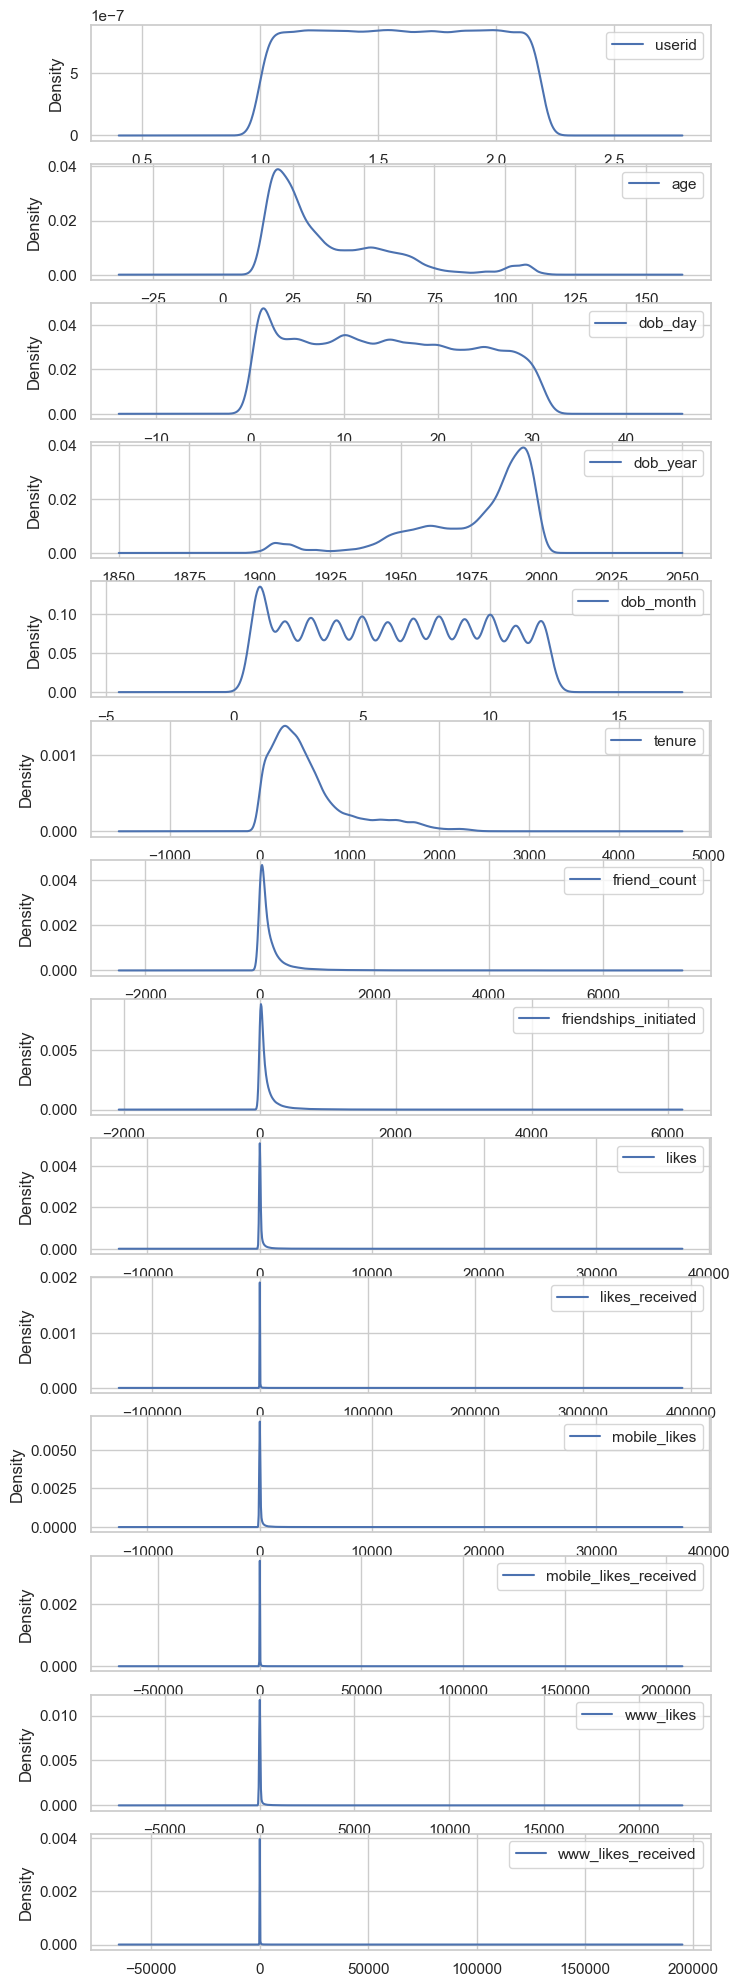

In [39]:
fig, axes = plt.subplots(14,1 ,figsize=(8,25))

for i,c in enumerate(num_features):
    f = df[[c]].plot(kind = 'kde', ax=axes[i])

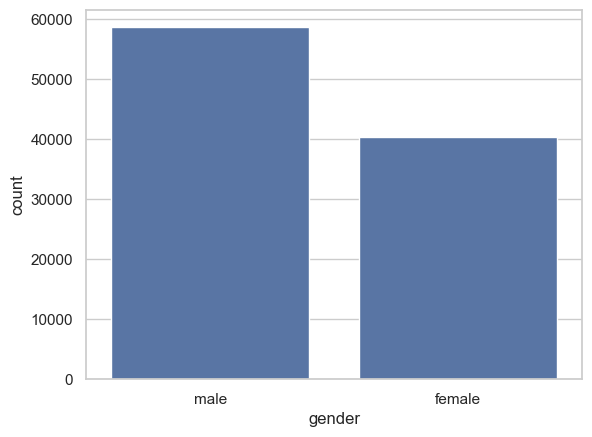

In [41]:
countplot = sns.countplot(x="gender", data=df)

In [45]:
df_mean = df[num_features].mean()
df.mean

<bound method DataFrame.mean of         userid  age  dob_day  dob_year  dob_month  gender  tenure  \
0      2094382   14       19      1999         11    male   266.0   
1      1192601   14        2      1999         11  female     6.0   
2      2083884   14       16      1999         11    male    13.0   
3      1203168   14       25      1999         12  female    93.0   
4      1733186   14        4      1999         12    male    82.0   
...        ...  ...      ...       ...        ...     ...     ...   
98998  1268299   68        4      1945          4  female   541.0   
98999  1256153   18       12      1995          3  female    21.0   
99000  1195943   15       10      1998          5  female   111.0   
99001  1468023   23       11      1990          4  female   416.0   
99002  1397896   39       15      1974          5  female   397.0   

       friend_count  friendships_initiated  likes  likes_received  \
0                 0                      0      0               0   
1

In [47]:
df_n = df.groupby('gender').mean()

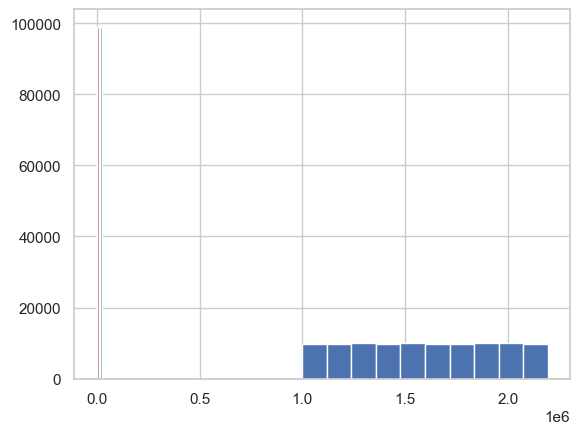

In [51]:
for r in num_features:
    df[r].hist()

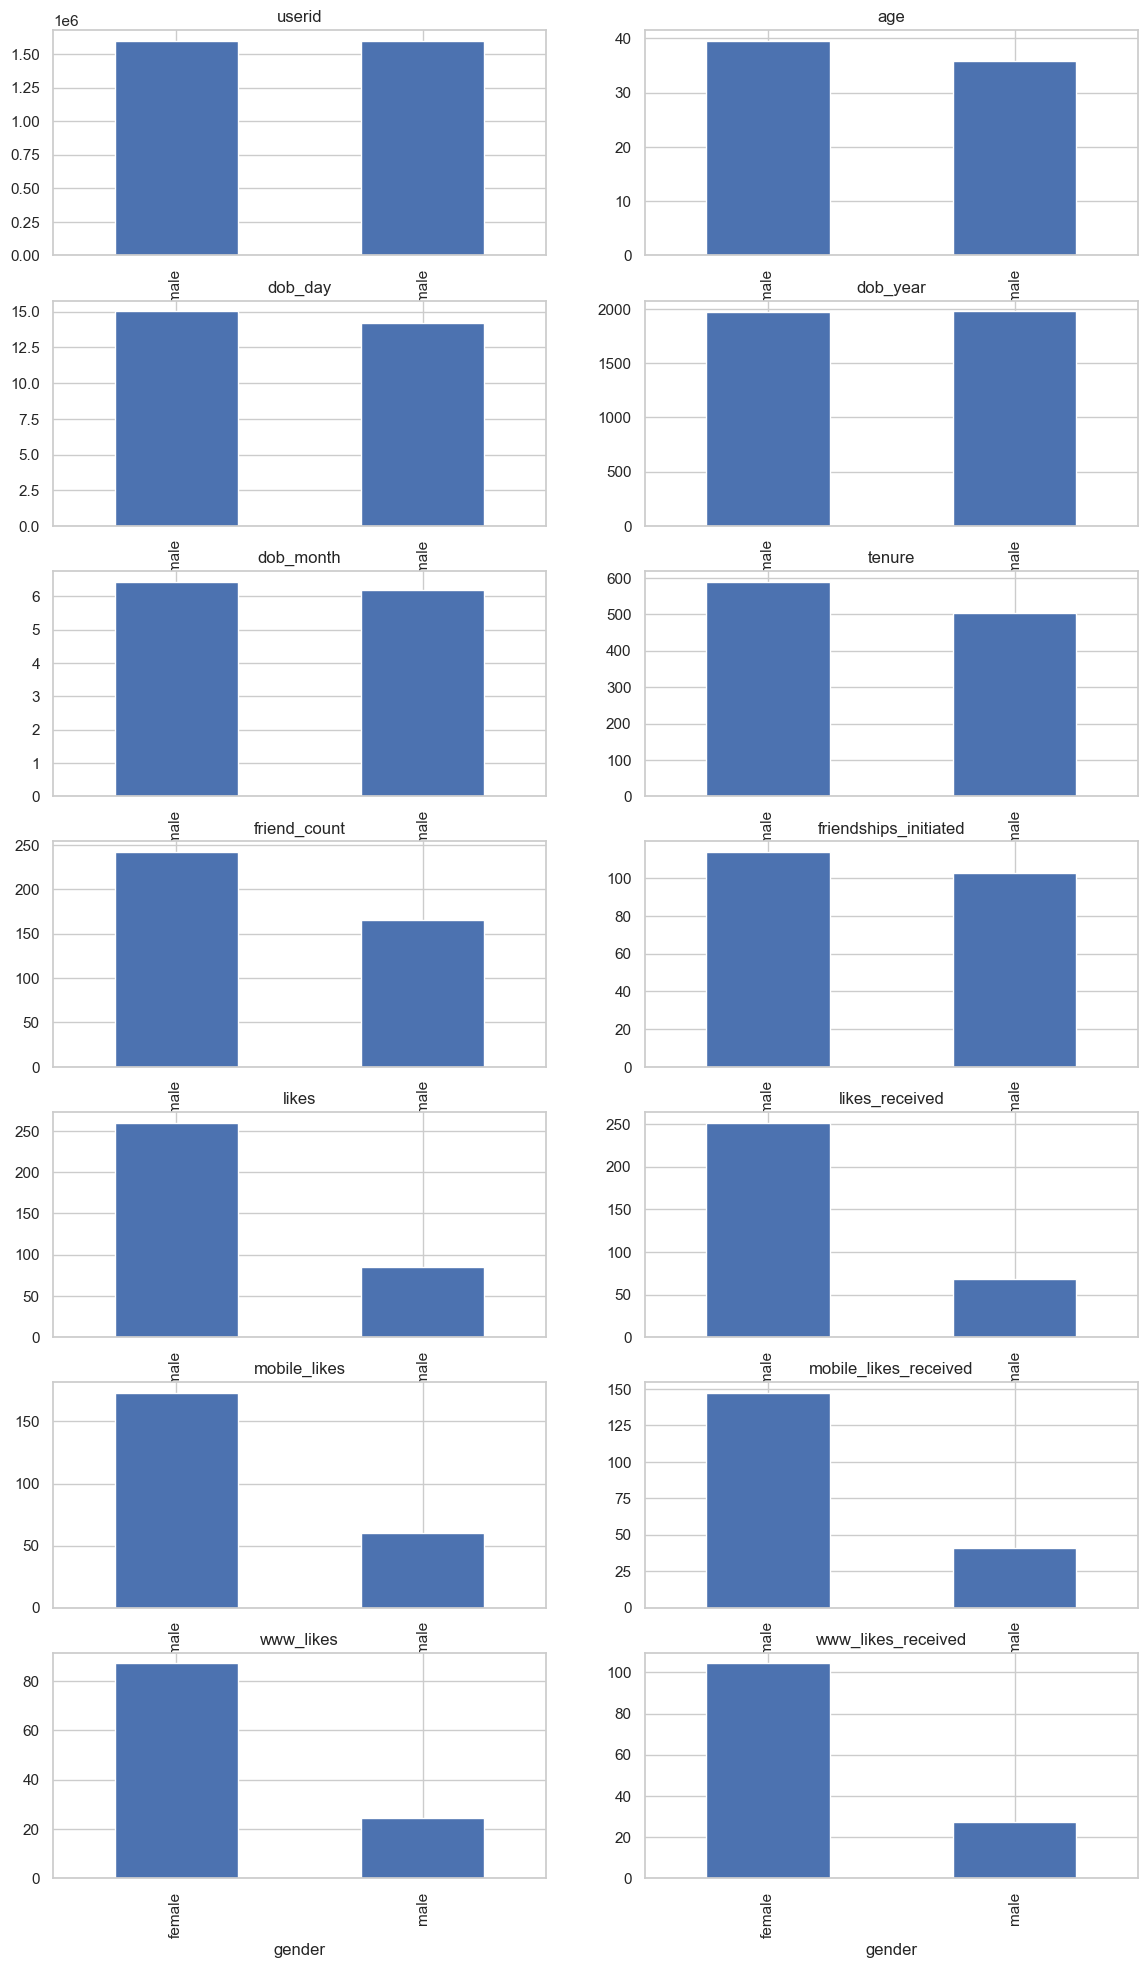

In [55]:
#Relationship between all features mean and our target feature "gender"

fix, axes = plt.subplots(7,2, figsize=(14,24))
axes = [ax for axes_row in axes for ax in axes_row]

for i,c in enumerate(df[num_features]):
    df_n = df.groupby('gender')[c].mean()
    plot = df_n.plot(kind='bar',title=c,ax=axes[i])

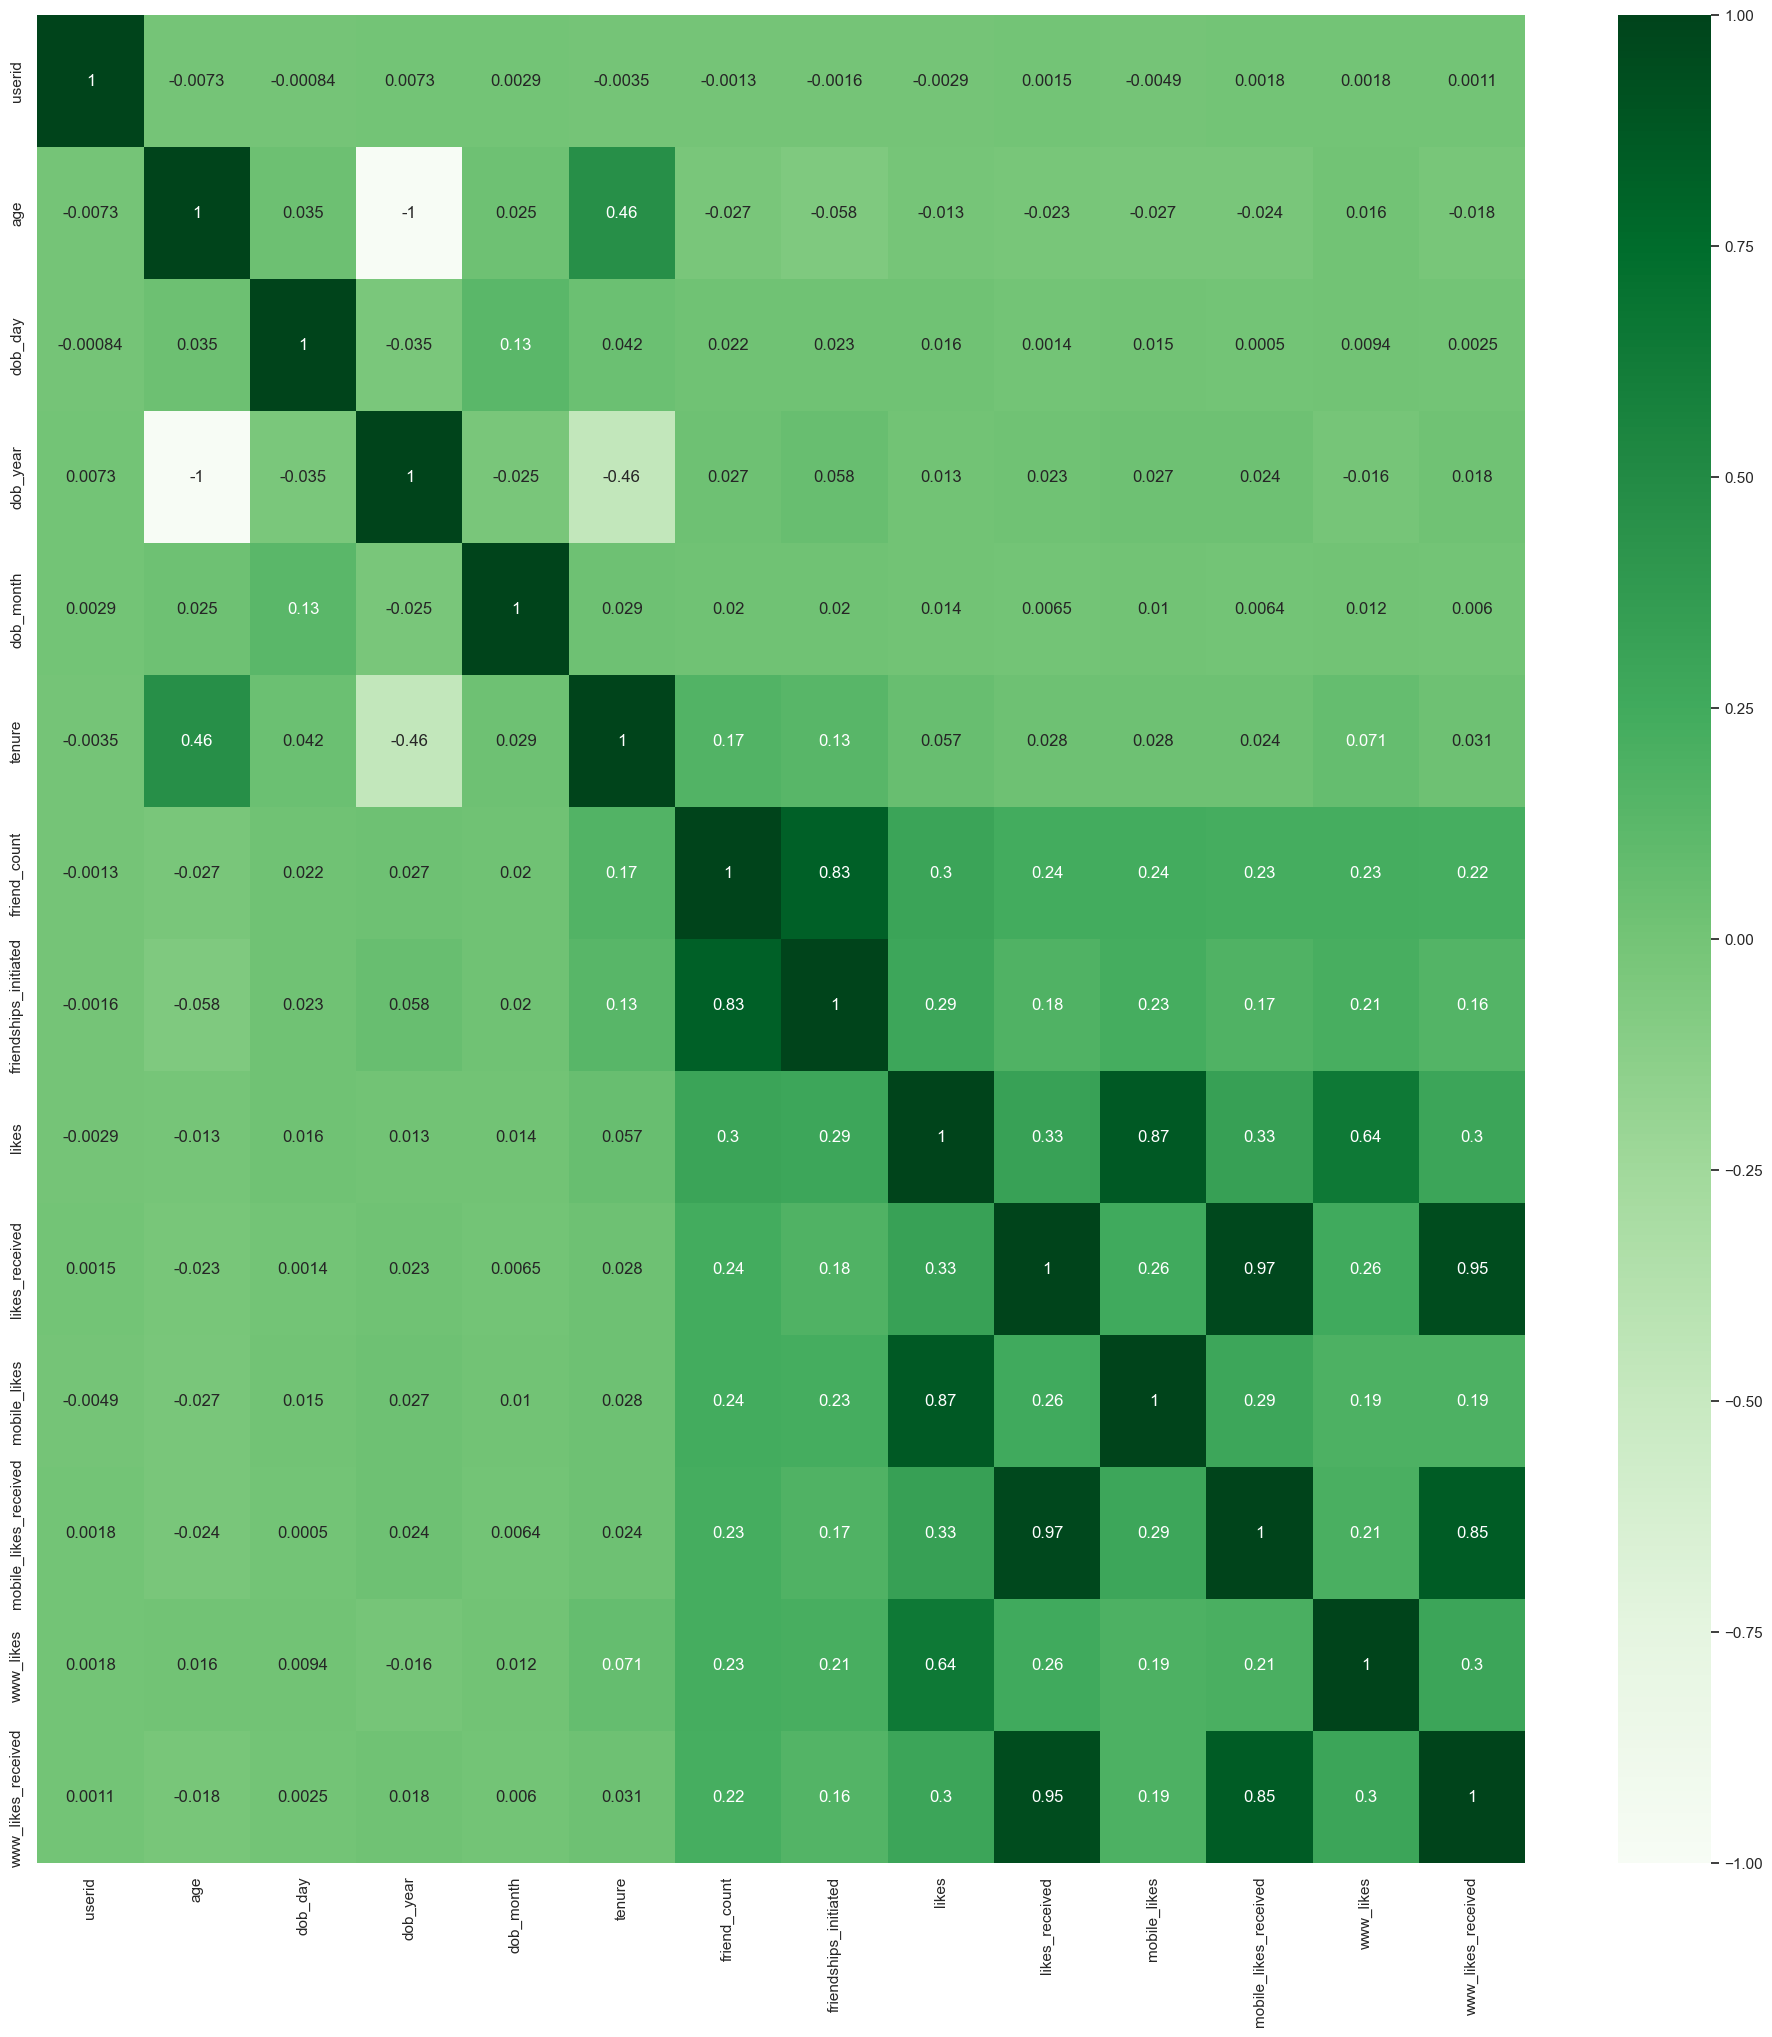

In [57]:
# Pearson Correlation matrix

corr_matrix = df[num_features].corr(method='pearson')
plt.figure(figsize=(24,24))
correc = sns.heatmap(corr_matrix, annot=True, cmap = 'Greens')

In [59]:
# Find features with high and low correlation
df['gender'] = df.gender.map({"male":0, "female":1})

df

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,0,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,1,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,0,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,1,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,0,82.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98998,1268299,68,4,1945,4,1,541.0,2118,341,3996,18089,3505,11887,491,6202
98999,1256153,18,12,1995,3,1,21.0,1968,1720,4401,13412,4399,10592,2,2820
99000,1195943,15,10,1998,5,1,111.0,2002,1524,11959,12554,11959,11462,0,1092
99001,1468023,23,11,1990,4,1,416.0,2560,185,4506,6516,4506,5760,0,756


In [61]:
det = df.corr()

In [63]:
det["gender"].sort_values(ascending=False)

gender                   1.000000
likes                    0.150567
mobile_likes             0.124310
www_likes                0.107918
friend_count             0.097638
tenure                   0.093523
age                      0.082228
likes_received           0.064988
www_likes_received       0.063122
mobile_likes_received    0.062193
dob_day                  0.046112
dob_month                0.035472
friendships_initiated    0.028335
userid                   0.001480
dob_year                -0.082228
Name: gender, dtype: float64

## Actions taken for data cleaning / feature engineering

1. All null values were replaced by the before fill method
2. Numerical and categorical variables were separated
3. After visualizing correlation matrix we where able to drop the least significant features for the feature "gender"
4. Robust scalar scaled every feature

## Key findings and Insights

1. Correlation and importance of all features were found
2. Distribution of values in features were seen
3. Relationship between features and our target feature were observed

In [73]:
# Dropping multiple columns from the DataFrame in a single call
df_final = df.drop(['dob_day', 'dob_month', 'friendships_initiated', 'userid'], axis=1)

# Display the modified DataFrame
df_final

,age,dob_year,gender,tenure,friend_count,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,14,1999,0,266.0,0,0,0,0,0,0,0
1,14,1999,1,6.0,0,0,0,0,0,0,0
2,14,1999,0,13.0,0,0,0,0,0,0,0
3,14,1999,1,93.0,0,0,0,0,0,0,0
4,14,1999,0,82.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
98998,68,1945,1,541.0,2118,3996,18089,3505,11887,491,6202
98999,18,1995,1,21.0,1968,4401,13412,4399,10592,2,2820
99000,15,1998,1,111.0,2002,11959,12554,11959,11462,0,1092
99001,23,1990,1,416.0,2560,4506,6516,4506,5760,0,756


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'dob_year'}>,
        <Axes: title={'center': 'gender'}>],
       [<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'friend_count'}>,
        <Axes: title={'center': 'likes'}>],
       [<Axes: title={'center': 'likes_received'}>,
        <Axes: title={'center': 'mobile_likes'}>,
        <Axes: title={'center': 'mobile_likes_received'}>],
       [<Axes: title={'center': 'www_likes'}>,
        <Axes: title={'center': 'www_likes_received'}>, <Axes: >]],
      dtype=object)

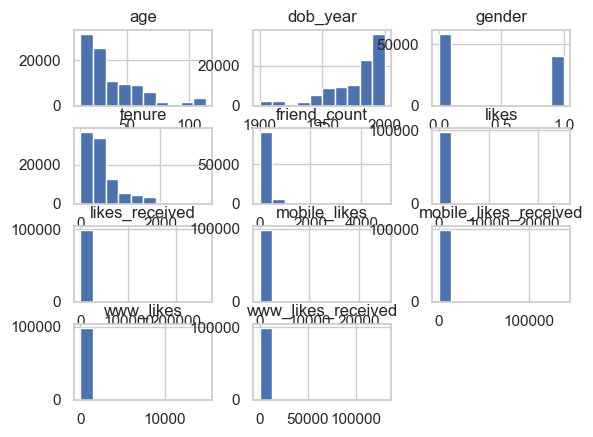

In [75]:
df_final.hist()

                 0             1             2             3             4   \
count  99003.000000  99003.000000  99003.000000  99003.000000  99003.000000   
mean       0.309341     -0.309341      0.407341      0.280393      0.653433   
std        0.752992      0.752992      0.491342      1.019284      2.213167   
min       -0.500000     -2.833333      0.000000     -0.917595     -0.468571   
25%       -0.266667     -0.733333      0.000000     -0.414254     -0.291429   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.733333      0.266667      1.000000      0.585746      0.708571   
max        2.833333      0.500000      1.000000      6.073497     27.662857   

                 5             6             7             8             9   \
count  99003.000000  99003.000000  99003.000000  99003.000000  99003.000000   
mean       1.813485      2.322230      2.219920      2.427894      7.137489   
std        7.153509     23.929648      9.679413    

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '2'}>],
       [<Axes: title={'center': '3'}>, <Axes: title={'center': '4'}>,
        <Axes: title={'center': '5'}>],
       [<Axes: title={'center': '6'}>, <Axes: title={'center': '7'}>,
        <Axes: title={'center': '8'}>],
       [<Axes: title={'center': '9'}>, <Axes: title={'center': '10'}>,
        <Axes: >]], dtype=object)

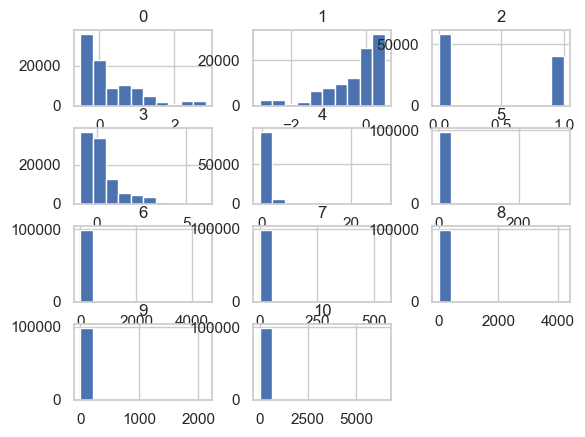

In [77]:
from sklearn.preprocessing import RobustScaler
from pandas import DataFrame

transformation = RobustScaler()
X = transformation.fit_transform(df_final)

dataset = DataFrame(X)

print(dataset.describe())

dataset.hist()


## Findings

1. likes, friend_count, tenure, age are positavely related to our target variable "gender"
2. dob_year is negatively related to "gender"
3. The rest of our features does not affect "gender", hence can be dropped

-> features for algorithm would be likes, mobile_likes, www_likes, friend_count, tenure, age, likes_received, www_likes_received, mobile_likes_received, dob_year

## Now we have to make 3 hypotheses about our dataset

1. The average likes received will be different for the two genders
2. Likes increase with tenure
3. Females will receive more likes than males

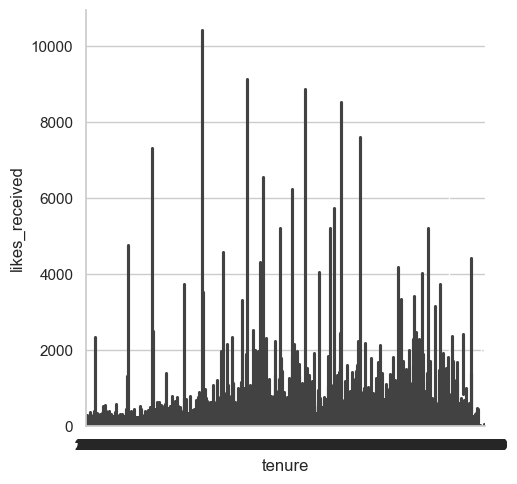

In [83]:
sns.catplot(x="tenure", y="likes_received", kind="bar", data=df)

## Conducting a significance test on one of our hypotheses



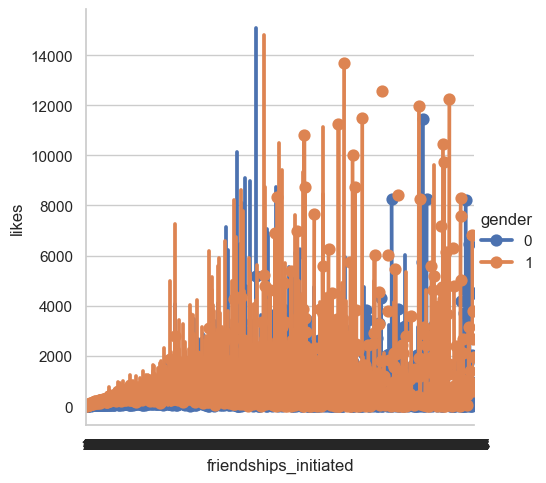

In [86]:
sns.catplot(x="friendships_initiated", y="likes", hue="gender", kind="point", data=df)

## Suggestion for next steps

1. Outlier removal algorithms ; Density based clustering algorithms can be used to clean the data

## Summary 

Average quality data - not to many highly correlated features for our target variable gender.